<a href="https://colab.research.google.com/github/Zhaxxon/Prob_Stat/blob/master/Course_project/IMDb_analysing_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMDb data analysing of 2020 movies for duration VS rating.


**Loading IMDb Dataset**

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

In [85]:
title_basics = pd.read_csv('drive/My Drive/project_data/title.basics.tsv.gz', sep='\t', encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**title.basics.tsv.gz** - Contains the following information for titles:


*   tconst (string) - alphanumeric unique identifier of the title
*   titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
*   primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
*   originalTitle (string) - original title, in the original language
*   isAdult (boolean) - 0: non-adult title; 1: adult title
*   startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
*   endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
runtimeMinutes – primary runtime of the title, in minutes
*   genres (string array) – includes up to three genres associated with the title

In [86]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [0]:
title_ratings = pd.read_csv('drive/My Drive/project_data/title.ratings.tsv.gz', sep='\t', encoding='utf-8')

**title.ratings.tsv.gz** – Contains the IMDb rating and votes information for titles:
*   tconst (string) - alphanumeric unique identifier of the title
*   averageRating – weighted average of all the individual user ratings
*   numVotes - number of votes the title has received

In [88]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1609
1,tt0000002,6.0,197
2,tt0000003,6.5,1287
3,tt0000004,6.1,121
4,tt0000005,6.1,2052


**We merge our 2 dataFrame "title_basics" and "title_ratings".**

In [0]:
data_merged_total = pd.merge(title_basics, title_ratings, on=['tconst'])

In [90]:
data_merged_total.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1609
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,197
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1287
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,121
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2052


In [91]:
data_merged_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031808 entries, 0 to 1031807
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1031808 non-null  object 
 1   titleType       1031808 non-null  object 
 2   primaryTitle    1031808 non-null  object 
 3   originalTitle   1031808 non-null  object 
 4   isAdult         1031808 non-null  int64  
 5   startYear       1031808 non-null  object 
 6   endYear         1031808 non-null  object 
 7   runtimeMinutes  1031808 non-null  object 
 8   genres          1031806 non-null  object 
 9   averageRating   1031808 non-null  float64
 10  numVotes        1031808 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 94.5+ MB


**Dtype of runtimeMinutes startYear we change to int. Because, further we need this runtimeMinutes when we sort out the movies as per duration. Before proceeding we need to get rid of from the missing values in runtimeMinutes**

In [0]:
data_merged_total = data_merged_total[(((data_merged_total.runtimeMinutes != '\\N') & (data_merged_total.runtimeMinutes != 'Reality-TV')) & (data_merged_total.runtimeMinutes != 'Talk-Show'))]

In [0]:
data_merged_total = data_merged_total[data_merged_total.startYear != '\\N']

In [0]:
data_merged_total['runtimeMinutes'] = data_merged_total['runtimeMinutes'].astype(np.int64)
data_merged_total['startYear'] = data_merged_total['startYear'].astype(np.int64)

In [95]:
data_merged_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752735 entries, 0 to 1031806
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          752735 non-null  object 
 1   titleType       752735 non-null  object 
 2   primaryTitle    752735 non-null  object 
 3   originalTitle   752735 non-null  object 
 4   isAdult         752735 non-null  int64  
 5   startYear       752735 non-null  int64  
 6   endYear         752735 non-null  object 
 7   runtimeMinutes  752735 non-null  int64  
 8   genres          752735 non-null  object 
 9   averageRating   752735 non-null  float64
 10  numVotes        752735 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 68.9+ MB


**We check how many types of videos we have in our dataset.**

In [96]:
title_types = data_merged_total.titleType.unique()
title_types


array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'video', 'tvSpecial', 'videoGame'], dtype=object)

**Here we sort out the movies from our dataset**

In [97]:
movies = data_merged_total[data_merged_total.titleType == 'movie']
movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.9,152
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,343
331,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.4,5
365,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.1,570
424,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",5.0,35
...,...,...,...,...,...,...,...,...,...,...,...
1031755,tt9914642,movie,Albatross,Albatross,0,2017,\N,97,Documentary,8.2,24
1031756,tt9914644,movie,9/11: Escape from the Towers,9/11: Escape from the Towers,0,2018,\N,120,Documentary,8.4,38
1031761,tt9914942,movie,La vida sense la Sara Amat,La vida sense la Sara Amat,0,2019,\N,74,Drama,6.8,78
1031791,tt9916160,movie,Drømmeland,Drømmeland,0,2019,\N,72,Documentary,6.6,36


**We sort out from movies just 2020 movies**

In [98]:
movies_2020 = movies[((movies.runtimeMinutes > 60) & (movies.runtimeMinutes < 200)) & (movies.startYear == 2020)]
movies_2020

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
39526,tt0062336,movie,El tango del viudo y su espejo deformante,El tango del viudo y su espejo deformante,0,2020,\N,70,Drama,6.1,19
410960,tt0926132,movie,Road to Red,Road to Red,0,2020,\N,120,"Action,Adventure,Horror",4.5,442
424756,tt0983946,movie,Fantasy Island,Fantasy Island,0,2020,\N,109,"Adventure,Fantasy,Horror",4.8,13199
428489,tt10006160,movie,Kala azar,Kala azar,0,2020,\N,90,Drama,6.6,12
429155,tt10022990,movie,Seeru,Seeru,0,2020,\N,123,"Action,Drama",5.4,178
...,...,...,...,...,...,...,...,...,...,...,...
1031322,tt9898858,movie,Coffee & Kareem,Coffee & Kareem,0,2020,\N,88,"Action,Comedy",5.1,7663
1031411,tt9902160,movie,Herself,Herself,0,2020,\N,97,Drama,7.6,30
1031528,tt9908390,movie,Le lion,Le lion,0,2020,\N,95,Comedy,4.9,172
1031612,tt9910530,movie,Svartklubb,Svartklubb,0,2020,\N,79,Horror,6.3,7


In [99]:
movies_2020.describe()

,isAdult,startYear,runtimeMinutes,averageRating,numVotes
count,1054.0,1054.0,1054.000000,1054.000000,1054.000000
mean,0.0,2020.0,102.335863,6.430266,1048.722960
std,0.0,0.0,20.903775,1.659639,6026.879723
min,0.0,2020.0,61.000000,1.100000,5.000000
25%,0.0,2020.0,88.000000,5.425000,14.000000
50%,0.0,2020.0,98.000000,6.600000,41.500000
75%,0.0,2020.0,115.000000,7.500000,195.500000
max,0.0,2020.0,183.000000,10.000000,98920.000000


**Visualising the averageRating and runtimeMinutes run of 2020 movies through histogram**

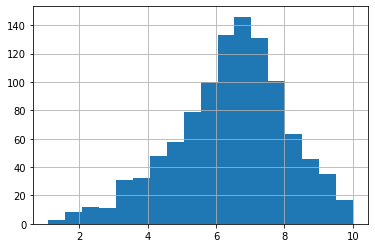

In [100]:
movies_2020['averageRating'].hist(bins=18)

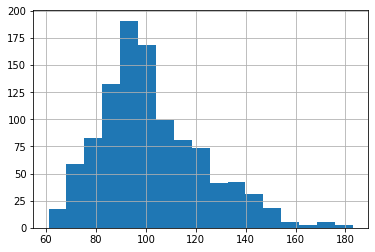

In [101]:
movies_2020['runtimeMinutes'].hist(bins=17)

**Correlation**

In [0]:
X = movies_2020['runtimeMinutes']
y = movies_2020['averageRating']

In [103]:
Corr = np.corrcoef(X, y)
Corr

array([[1.        , 0.12786758],
       [0.12786758, 1.        ]])

In [0]:
# Here we see that there is no correlation between 'runtimeMinutes' and 'averageRating'

**Linier regression**

In [105]:
# Linear regression equation with b0 and b1 coefficients:
b1 = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b1

0.01015194695975776

In [106]:

b0 = np.mean(y) - b1 * np.mean(X)
b0

5.391357397558467

In [107]:
y_pred = b0 + b1 * X
y_pred

39526      6.101994
410960     6.609591
424756     6.497920
428489     6.305033
429155     6.640047
             ...   
1031322    6.284729
1031411    6.376096
1031528    6.355792
1031612    6.193361
1031621    6.437008
Name: runtimeMinutes, Length: 1054, dtype: float64

Text(0, 0.5, 'averageRating')

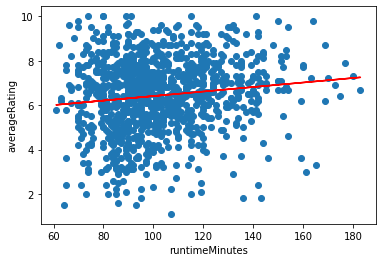

In [108]:
# Values (scatter plot) and linear regression function (red line)
ox = X
oy = y_pred

plt.scatter(X, y)
plt.plot(ox, oy, color='red')

plt.xlabel('runtimeMinutes')
plt.ylabel('averageRating')

In [109]:
# R2 score
R2 = y_pred.var() / y.var()
R2

0.016350118981989865

Conclusion is that averageRating not depends on runtimeMinutes.